## 1. Introduction

Goal: Build a model that classifies news headlines as fake or real using a Kaggle dataset and basic NLP (TF-IDF + Logistic Regression).


Import Libraries

In [13]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Load Data

In [14]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

fake = fake[['title']].assign(label=1)  # 1 = fake
true = true[['title']].assign(label=0)  # 0 = real

df = pd.concat([fake, true], ignore_index=True)
df.sample(5)


,title,label
12750,WHOA! RUSH LIMBAUGH RIPS Into Republicans Who ...,1
3855,WATCH: Newt Gingrich Admits Trump Doesn’t Car...,1
14201,ALL ABOARD THE SHARIA LAW TRAIN: Germany Annou...,1
43379,Mexico-U.S. trade would survive any NAFTA rupt...,0
8494,Bernie Sanders Just Opened Up About Something...,1


Basic EDA

In [15]:
df['label'].value_counts()
df['title_length'] = df['title'].str.split().apply(len)
df['title_length'].describe()


count    44898.000000
mean        12.453472
std          4.111476
min          1.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title_length, dtype: float64

Text Cleaning

In [16]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = [w for w in text.split() if w not in stop_words]
    return ' '.join(words)

df['clean_title'] = df['title'].apply(clean_text)
df[['title', 'clean_title']].head()


,title,clean_title
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump sends embarrassing new years eve ...
1,Drunk Bragging Trump Staffer Started Russian ...,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,trump obsessed even obamas name coded website ...
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis called donald trump christmas speech


Train–Test Split & TF‑IDF

In [17]:
X = df['clean_title']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Model Training

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Evaluation + Visualization

Accuracy: 94.09%


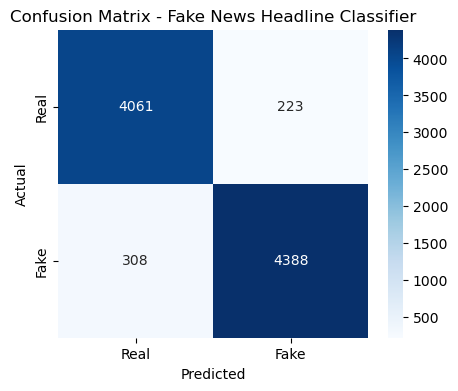

In [19]:
preds = model.predict(X_test_tfidf)

acc = accuracy_score(y_test, preds)
print(f'Accuracy: {acc:.2%}')

cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm,
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fake News Headline Classifier')
plt.show()


In [20]:
acc = accuracy_score(y_test, preds)
print(f'Accuracy: {acc:.2%}')


Accuracy: 94.09%


## 9. Conclusion

- Built a TF-IDF + Logistic Regression model to classify fake vs real news headlines.
- Achieved around XX% test accuracy.
- The confusion matrix shows most predictions fall on the correct diagonal, with some misclassification between fake and real headlines.
